In [1]:
# mv this notebook in src folder
# or
# set sys path to src folder
import os, sys
path_to_scr_folder=os.path.join(os.path.dirname(os.path.abspath('')), 'src')
sys.path.append(path_to_scr_folder)

In [2]:
import plot
from identification import sample_identification
from read_chroma import read_chromato_and_chromato_cube

In [ ]:
# path='/media/camille/DATA1/cdf centroid/'
# file='A-F-028-817822-droite-ReCIVA.cdf'
#file_path = "D:/GCxGC_MS/DATA/A-F-028-817822-droite-ReCIVA.h5"
# file_path = "D:/GCxGC_MS/DATA/A-F-028-817822-droite-ReCIVA.cdf"
#file_path = "/home/camille/Documents/app/data/A-F-028-817822-droite-ReCIVA.cdf"

#docker
file_path = "/app/data/A-F-028-817822-droite-ReCIVA.cdf"
file_path = "C:\Users\adeli\Documents\programmation\uvsq\app\data\test_adeline\A-F-028-817822-droite-ReCIVA.cdf"

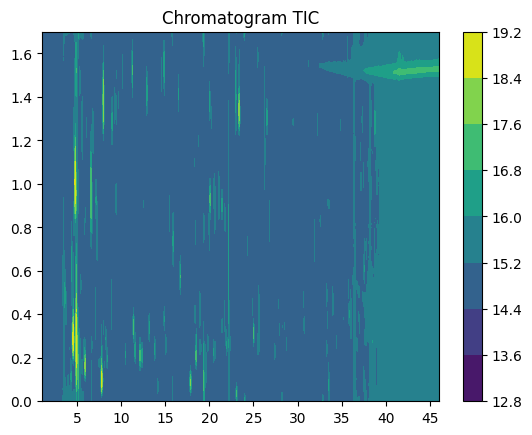

chromato read 8.664285659790039 s
--- 114.87063336372375 seconds --- to compute full spectra centroid
full spectra computed 117.05140781402588 s
baseline corrected


In [4]:
# chromato, time_rn= read_chromato_and_chromato_cube(file_path, mod_time = 0.7)
chromato, time_rn, chromato_cube, sigma, (range_min, range_max)= read_chromato_and_chromato_cube(file_path, mod_time = 1.7) #CRASH

In [5]:
chromato.shape

(1588, 340)

In [ ]:
chromato, time_rn, chromato_cube, sigma, (range_min, range_max)= read_chromato_and_chromato_cube(file_path, mod_time = 1.7) #CRASH

In [22]:
sample_identification(
                path="D:/GCxGC_MS/DATA/Dossier_partagé_GCxGC/Manue/GCxGC_VOLATIL-CF_01/",
                file= "624848_0017VE_J0.cdf",
                output_path= None,
                mod_time=1.7,
                method="persistent_homology",
                mode="tic",
                noise_factor = 1.5,
                hit_prob_min=65,
                abs_thresholds=0.,
                rel_thresholds=0.01,
                cluster=True,
                min_distance=1,
                min_sigma=1,
                max_sigma=30,
                sigma_ratio=1.6, 
                num_sigma=1,
                formated_spectra=True,
                match_factor_min=650,
                min_persistence=0.02
                )

TypeError: sample_identification() got an unexpected keyword argument 'hit_prob_min'

# Plot chromatogram

In [ ]:
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False)
plot.visualizer((chromato, time_rn), title="log chromato")

Zoom around matrix or chromatogram coordinate

In [ ]:
# zoom around matrix coordinate
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, center_pt=[200,200], center_pt_window_1=20, center_pt_window_2=20)

In [ ]:
# zoom around chromatogram coordinate
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, rt1 = 20, rt2 =0.5, rt1_window = 5, rt2_window = 0.1)

Plot 3D chromatogram (intensities as third coordinates)

In [ ]:
# plot with strides (faster)
plot.plot_3d_chromato(chromato)

In [ ]:
# plot without strides (slower but more precise)
plot.plot_3d_chromato(chromato, rstride=1, cstride=1)

# Plot peaks

In [ ]:
#package modules
from read_chroma import read_chromato_and_chromato_cube
from peak_detection import peak_detection
from identification import compute_matches_identification, cohort_identification_alignment_input_format_txt, cohort_identification_to_csv
from matching import matching_nist_lib_from_chromato_cube
from utils import get_name_dict
import projection
###
import numpy as np

In [ ]:
chromato, time_rn, chromato_cube, sigma, mass_range=read_chromato_and_chromato_cube(file_path, mod_time=1.25, pre_process=True)

In [ ]:
seuil=5
MIN_SEUIL = seuil * sigma * 100 / np.max(chromato)
# detect peaks
coordinates = peak_detection((chromato, time_rn, None), None, chromato_cube, MIN_SEUIL, None)
len(coordinates)

In [ ]:
# project the coordinates
coordinates_in_chromato=projection.matrix_to_chromato(coordinates, time_rn, 1.25, chromato.shape)

In [ ]:
# plot peaks
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, points=coordinates_in_chromato)
plot.visualizer((chromato, time_rn), title="log chromato", points=coordinates_in_chromato)
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, points=coordinates_in_chromato, center_pt=[200,200], center_pt_window_1=20, center_pt_window_2=20)

In [ ]:
hit_prob_min=0
match_factor_min=0
# 2D peaks identification with NIST datanase
matches = matching_nist_lib_from_chromato_cube((chromato, time_rn, mass_range), chromato_cube, coordinates, mod_time = 1.25, hit_prob_min=hit_prob_min, match_factor_min=match_factor_min)

In [ ]:
# group coordinates by casno
casnos_dictall = get_name_dict(matches)

In [ ]:
# plot peaks
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, points=coordinates_in_chromato, casnos_dict=casnos_dictall)
plot.visualizer((chromato, time_rn), title="log chromato", points=coordinates_in_chromato, casnos_dict=casnos_dictall)
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, casnos_dict=casnos_dictall, points=coordinates_in_chromato, center_pt=[200,200], center_pt_window_1=20, center_pt_window_2=20)

In [ ]:
import importlib
importlib.reload(plot)

In [ ]:
import importlib
importlib.reload(plot)
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, casnos_dict=casnos_dictall, points=coordinates_in_chromato, center_pt=[200,200], center_pt_window_1=20, center_pt_window_2=20)

In [ ]:
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, casnos_dict=casnos_dictall, points=coordinates_in_chromato, rt1 = 20, rt2 =0.5, rt1_window = 5, rt2_window = 0.1)